# Exploratory Data Analysis (EDA) - Stock Price Data

This notebook demonstrates exploratory data analysis on stock price data for multiple tickers using helper functions from the quantitative analysis pipeline.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add the parent directory to sys.path to allow imports from src
sys.path.append(os.path.abspath(os.path.join('..')))

from src.fnsa.pipelines.quantitative_analysis import (
    load_price_data,
    compute_indicators,
    plot_price_and_sma,
    plot_rsi,
    plot_macd
)

## 1. Load Price Data for Multiple Tickers

Available tickers: AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

In [2]:
# Define tickers to analyze
tickers = ["TSLA", "AAPL","GOOG"]  # Add more tickers here: "AMZN", "GOOG", "META", "MSFT", "NVDA"

# Load data for all tickers
ticker_data = {}
for ticker in tickers:
    df = load_price_data(ticker)
    ticker_data[ticker] = df
    print(f"Loaded {len(df)} rows for {ticker}")

# Show sample data for first ticker
print(f"\nSample data for {tickers[0]}:")
ticker_data[tickers[0]].head()

c:\BackUp\web-projects\tenx\finance-challange-week1\src\fnsa\pipelines\quantitative_analysis.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


Loaded 250 rows for TSLA


c:\BackUp\web-projects\tenx\finance-challange-week1\src\fnsa\pipelines\quantitative_analysis.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


Loaded 250 rows for AAPL


c:\BackUp\web-projects\tenx\finance-challange-week1\src\fnsa\pipelines\quantitative_analysis.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


Loaded 250 rows for GOOG

Sample data for TSLA:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800,TSLA
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000,TSLA
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300,TSLA
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100,TSLA
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000,TSLA


## 2. Descriptive Statistics

In [3]:
# Descriptive statistics for each ticker
price_cols = ["Open", "High", "Low", "Close", "Volume"]

for ticker in tickers:
    print(f"\n{'='*60}")
    print(f"Descriptive Statistics for {ticker}")
    print(f"{'='*60}")
    print(ticker_data[ticker][price_cols].describe())


Descriptive Statistics for TSLA
Price        Open        High         Low       Close        Volume
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean   217.075040  221.631680  212.674320  217.475240  1.373516e+08
std     42.282592   42.458512   41.831715   41.916800  3.577549e+07
min    103.000000  111.750000  101.809998  108.099998  6.512520e+07
25%    186.375004  189.937500  182.912502  186.122494  1.117632e+08
50%    223.564995  226.555000  218.019997  222.144997  1.286707e+08
75%    251.787495  257.992500  247.394993  253.019993  1.579521e+08
max    296.040009  299.290009  289.519989  293.339996  3.065906e+08

Descriptive Statistics for AAPL
Price        Open        High         Low       Close        Volume
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean   170.222273  171.803594  168.962667  170.510818  5.922355e+07
std     17.536308   17.272208   17.538699   17.340361  1.778332e+07
min    124.137239  125.871079  122.324571  123.161

## 3. Compute Technical Indicators

Calculate SMA, EMA, RSI, and MACD for all tickers.

In [4]:
# Compute indicators for all tickers
for ticker in tickers:
    ticker_data[ticker] = compute_indicators(ticker_data[ticker])
    print(f"Computed indicators for {ticker}")

# Show indicators for first ticker
print(f"\nIndicators for {tickers[0]}:")
ticker_data[tickers[0]][['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD']].tail()

Computed indicators for TSLA
Computed indicators for AAPL
Computed indicators for GOOG

Indicators for TSLA:


Price,Close,SMA_20,SMA_50,RSI_14,MACD
Date,,,,,
2023-12-22,252.539993,244.503500,232.553000,58.137457,5.223832
2023-12-26,256.609985,245.529999,232.662800,60.824036,5.495891
2023-12-27,261.440002,246.265999,232.813200,63.793640,6.031711
2023-12-28,253.179993,246.717999,232.779799,55.978816,5.723858
2023-12-29,248.479996,247.137998,232.895800,52.070118,5.042505


## 4. Visualize Price with SMA

Plot closing price with Simple Moving Averages for each ticker.

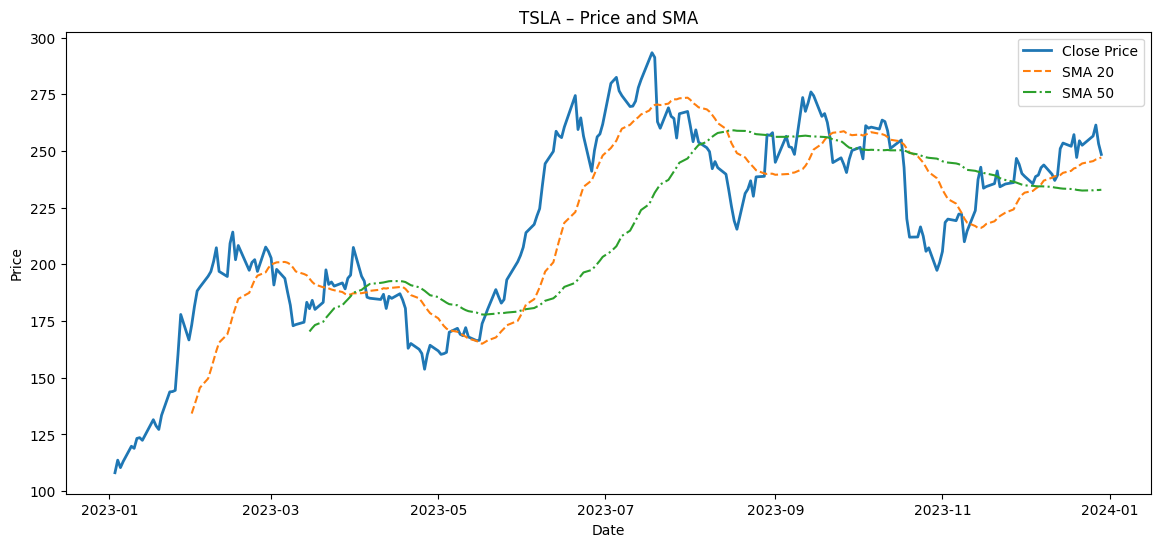

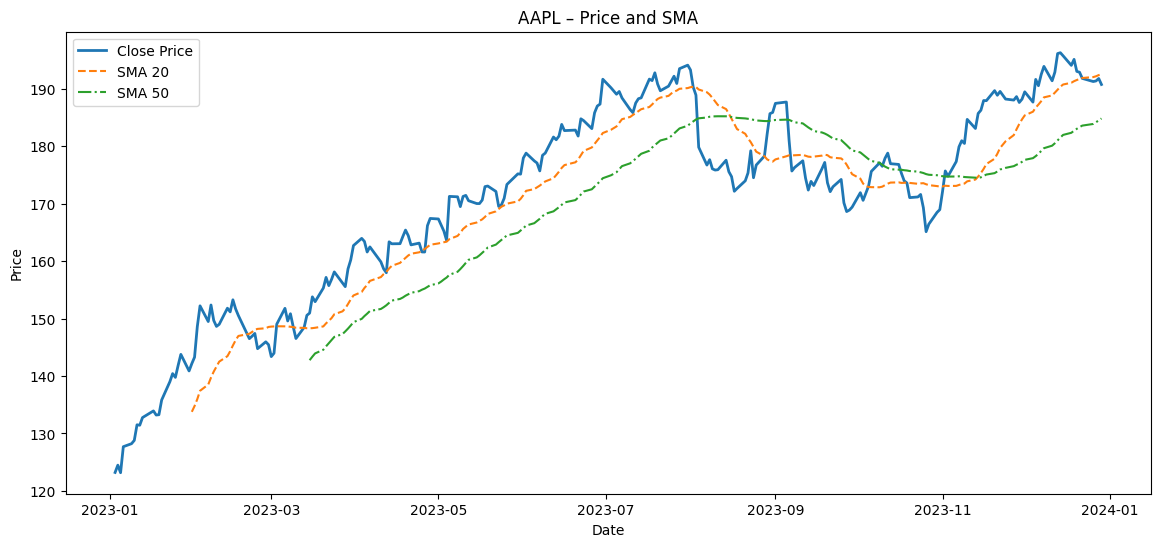

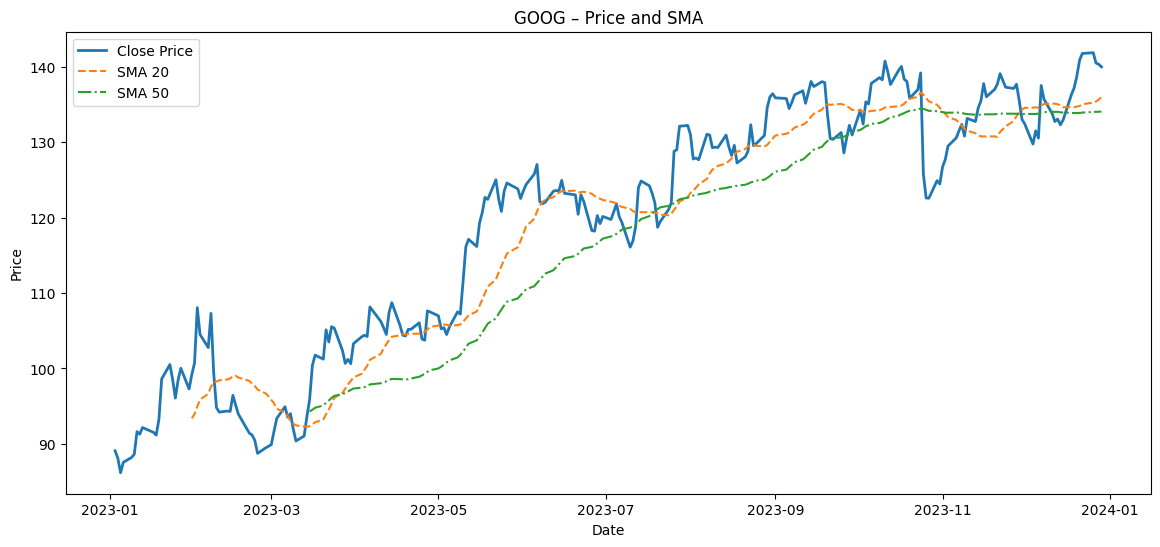

In [5]:
# Visualize price with SMA for each ticker
for ticker in tickers:
    plot_price_and_sma(ticker_data[ticker], ticker)

## 5. Visualize RSI

Plot RSI with overbought/oversold levels for each ticker.

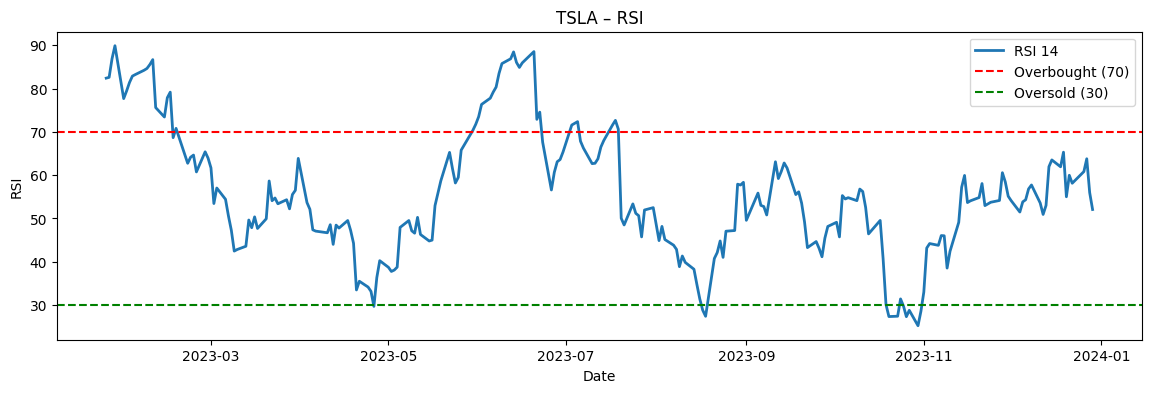

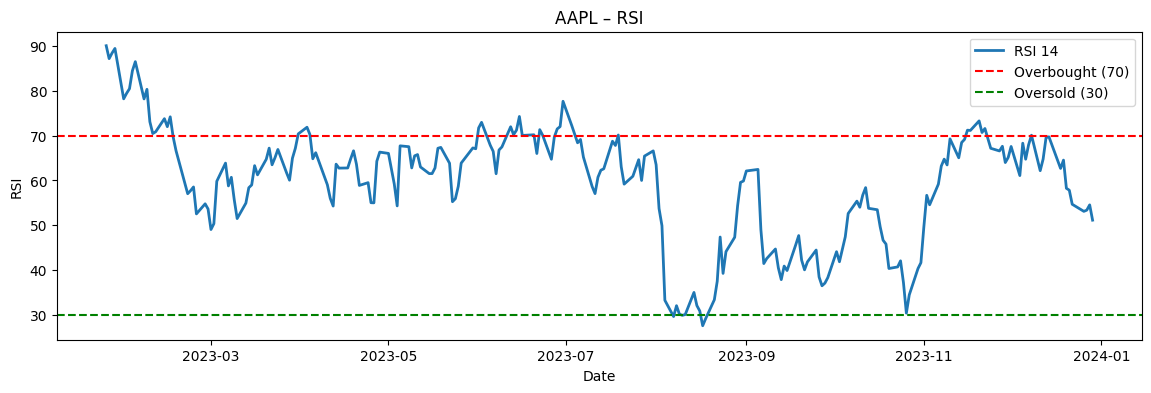

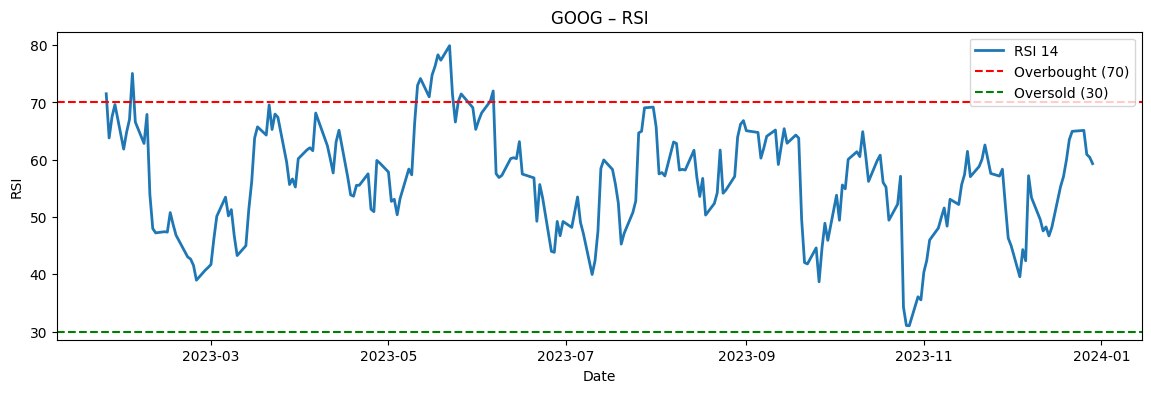

In [6]:
# Visualize RSI for each ticker
for ticker in tickers:
    plot_rsi(ticker_data[ticker], ticker)

## 6. Visualize MACD

Plot MACD indicator with signal line and histogram.

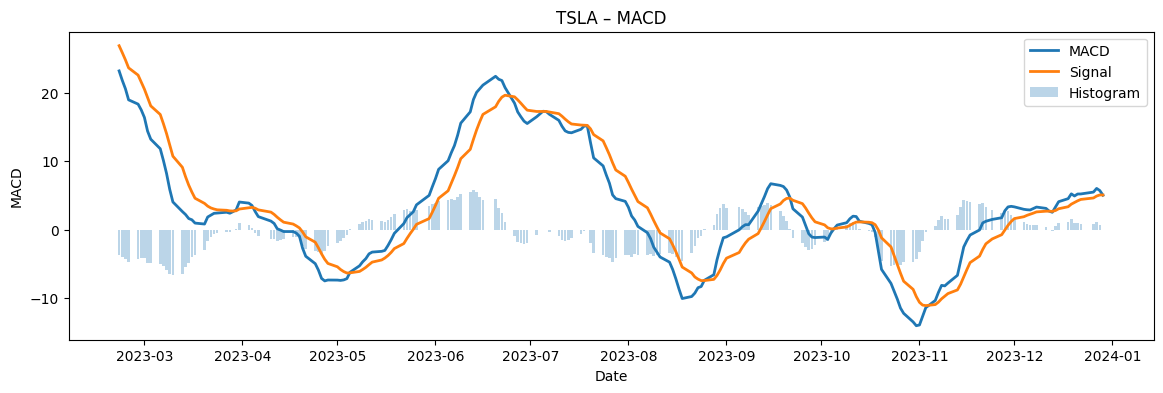

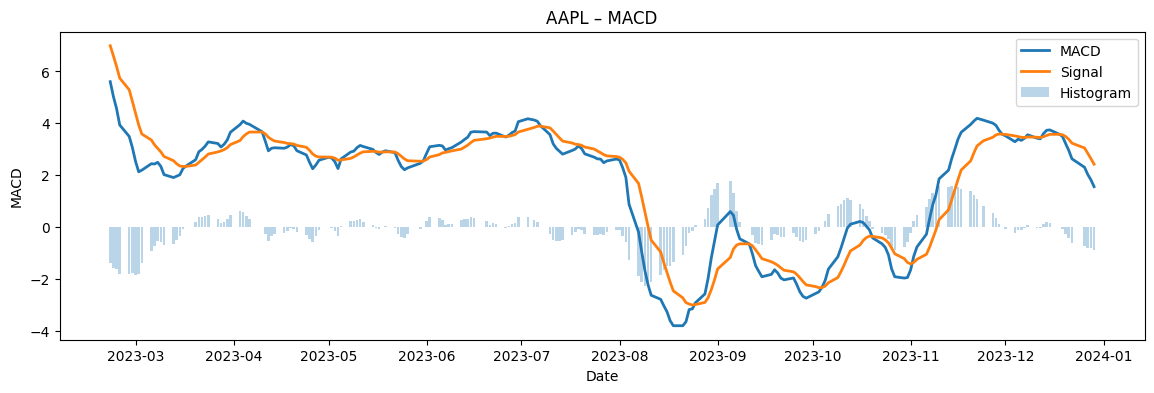

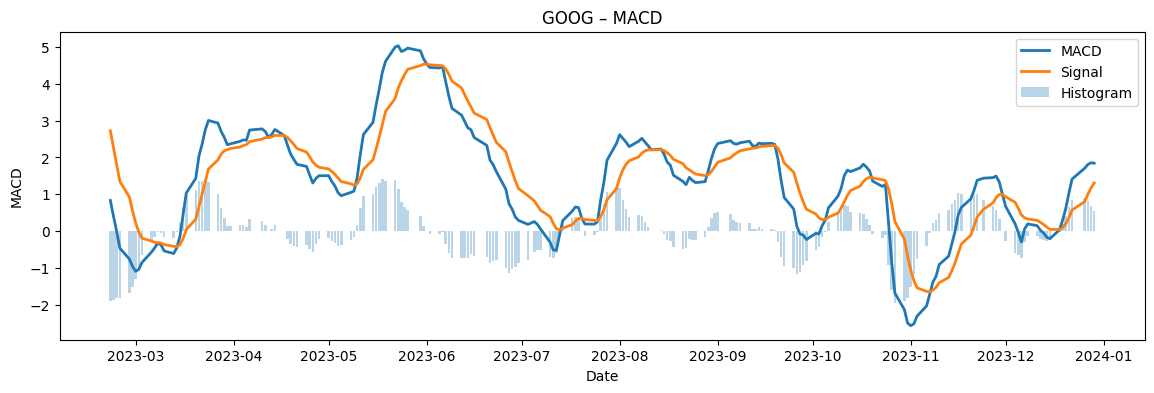

In [7]:
# Visualize MACD for each ticker
for ticker in tickers:
    plot_macd(ticker_data[ticker], ticker)

## 7. Trading Volume Analysis

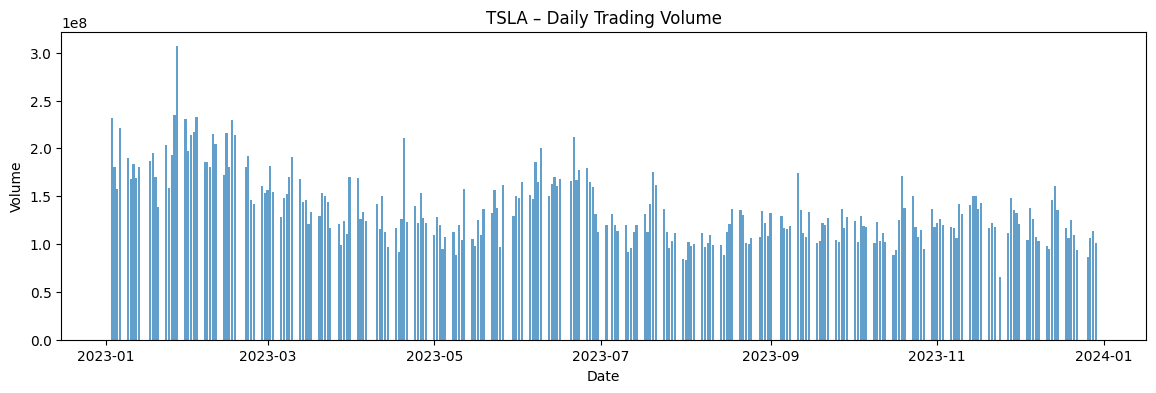

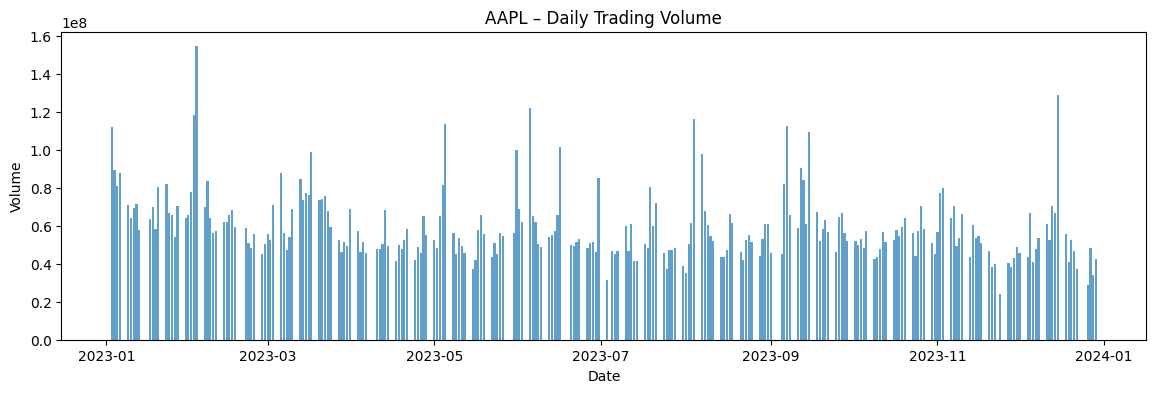

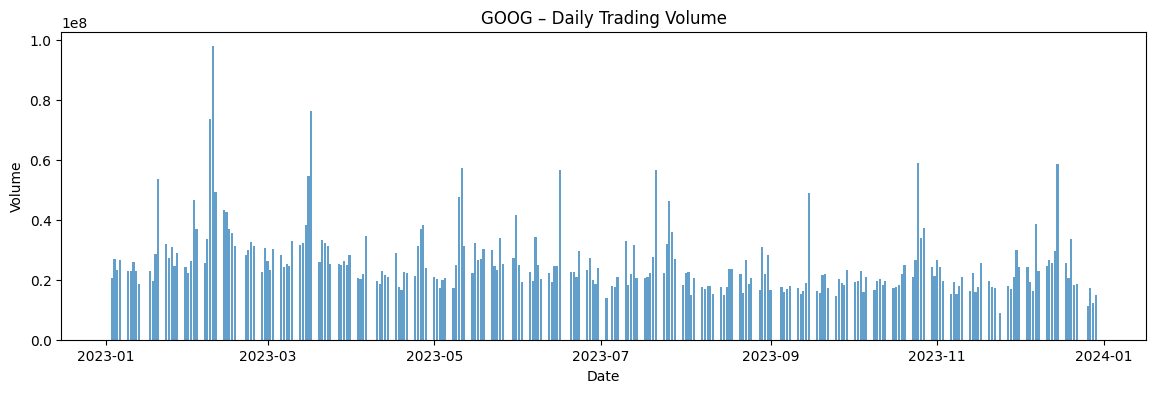

In [8]:
# Plot trading volume for each ticker
for ticker in tickers:
    plt.figure(figsize=(14, 4))
    plt.bar(ticker_data[ticker].index, ticker_data[ticker]['Volume'], width=0.8, alpha=0.7)
    plt.title(f'{ticker} – Daily Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

## 8. Comparative Analysis

Compare closing prices across all tickers.

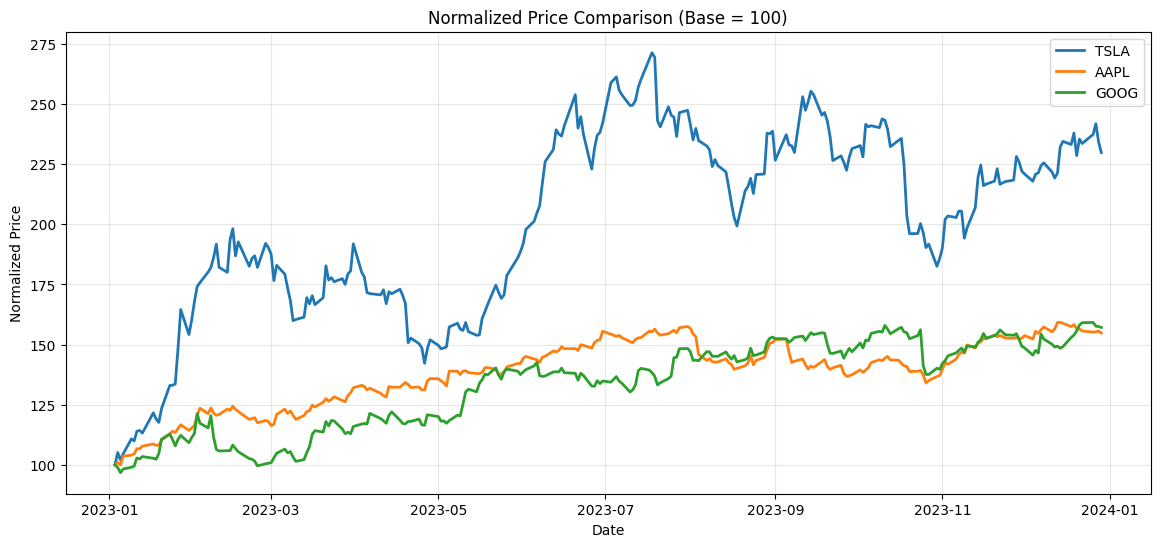

In [9]:
# Normalize prices to compare trends
plt.figure(figsize=(14, 6))
for ticker in tickers:
    df = ticker_data[ticker]
    price = df['Adj Close'] if 'Adj Close' in df.columns else df['Close']
    # Normalize to 100 at start
    normalized = (price / price.iloc[0]) * 100
    plt.plot(df.index, normalized, label=ticker, linewidth=2)

plt.title('Normalized Price Comparison (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()